In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt

In [25]:

def extract_data_within_intervals(base_path, level, old = False):
    if old:
        participants = ['pp1', 'pp3', 'pp4', 'pp6', 'pp7', 'pp8', 'pp9']
    else:
        participants = ['pp1', 'pp3', 'pp4', 'pp5', 'pp6', 'pp7', 'pp8', 'pp9', 'pp10']
    all_joint_data = []
    key = level

    for participant in participants:
        joint_path = os.path.join(base_path, participant, 'IK')
        pertinfo_path = os.path.join(base_path, participant, 'pertinfo')
        
        # Process joint data files and pertinfo files
        for mot_file in os.listdir(joint_path):
            if key in mot_file and mot_file.endswith('.mot'):
                joint_full_path = os.path.join(joint_path, mot_file)
                
                # Read the .mot file, setting skiprows to skip header lines correctly
                # Line 12 (index 11) contains the headers for columns
                joint_data = pd.read_csv(joint_full_path, delimiter='\t', skiprows=range(10), header=0)
                
                # Corresponding pertinfo file
                pertinfo_file = mot_file.replace('joint', 'pertinfo').replace('.mot', '.mat')  # Adjust naming convention if necessary
                pertinfo_full_path = os.path.join(pertinfo_path, pertinfo_file)
                
                if os.path.exists(pertinfo_full_path):
                    pert_mat = scipy.io.loadmat(pertinfo_full_path)
                    time_intervals = pert_mat['time_start_stop']
                    time_intervals = time_intervals[0]
                    
                    start_time, end_time = int(time_intervals[0] * 100), int(time_intervals[1] * 100)
                    duration = 150
                    
                    # Check if start_time and duration does not exceed number of rows
                    if start_time + duration <= len(joint_data):
                        joint_data_filtered = joint_data.iloc[start_time:start_time + duration]
                        #print(joint_data_filtered)
                        
                        # Create a dictionary with each joint's data
                        joint_data_dict = {col: joint_data_filtered[col].values.tolist() for col in joint_data_filtered.columns}
                        #print(joint_data_filtered.columns)

                        all_joint_data.append({
                            'participant': participant,
                            'file': mot_file,
                            'interval': (start_time, end_time),
                            'data': joint_data_dict
                        })
                        #print(joint_data_dict)

    return all_joint_data

base_path = '../../Downloads/YoungData_vEMG/YoungData_vEMG'  # Adjust this path as needed
old_path = '../../Downloads/OlderData_vEMG/OlderData_vEMG'
joint_data_within_intervals = extract_data_within_intervals(base_path, 'anterior_1')
joint_data_high = extract_data_within_intervals(base_path, 'anterior_3')
old_emg_data_within_intervals = extract_data_within_intervals(old_path, 'anterior_1', old = True)

In [26]:
def stack_joint_data(all_joint_data):
    # Dictionary to store the 2D arrays for each joint
    joint_data_stacked = {}

    # Collect data for each joint across all participants
    for data in all_joint_data:
        for joint, values in data['data'].items():
            if joint not in joint_data_stacked:
                joint_data_stacked[joint] = []
            joint_data_stacked[joint].append(values)  # Append the whole array for the participant

    # Convert lists of arrays into 2D numpy arrays
    for joint in joint_data_stacked:
        try:
            # Stack the list of arrays vertically (each row is one participant's data)
            joint_data_stacked[joint] = np.vstack(joint_data_stacked[joint])
        except ValueError:
            print(f"Error: Data arrays for {joint} have mismatched lengths and cannot be stacked.")

    return joint_data_stacked

average_joint = stack_joint_data(joint_data_within_intervals)
old_averge_joint = stack_joint_data(old_emg_data_within_intervals)

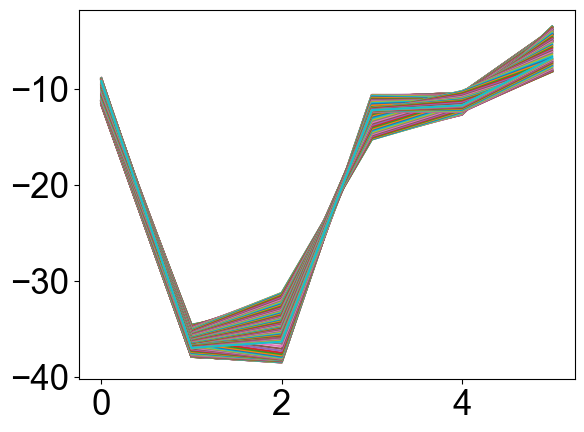

In [28]:
flex_extension_exp = average_joint['lumbar_extension']
flex_extension_old_exp = old_averge_joint['lumbar_extension']

plt.plot(flex_extension_old_exp)
plt.show()

In [5]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name = '2025_01_22_22_53_000SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoTorsoReachFixed-v1'
steps = 1000
cut = 100

pkl_path = './output/PKL/' + env_name + '/'
ep = 50


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [0, 2, 4, 6, 8, 10]

In [6]:
AP_pert = []
stand = []
fall = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP = [], [], [], [], []
pert_1_AP_high, pert_2_AP_high, pert_3_AP_high, pert_4_AP_high, pert_5_AP_high = [], [], [], [], []
for i in range(50, 100):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        stand.append(data.copy())
    else:
        fall.append(data.copy())
    
print(len(stand))
mass = 150

46


In [7]:
name_80 = '2025_01_24_00_17_040SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
name_60 = '2025_01_24_22_03_170SAC'
name_40 = '2025_01_25_12_05_250SAC'
old_env_name = 'myoSarcTorsoReachFixed-v1'
pkl_path = './output/PKL/' + old_env_name + '/'
ep = 30

stand_80, stand_60, stand_40 = [], [], []
fall_80, fall_60, fall_40 = [], [], []

for i in range(30, 60):
    file_path = pkl_path + name_80 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'muscleInfo': data['muscleInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_80.append(filtered_data)


In [8]:
for i in range(30, 60):
    file_path = pkl_path + name_60 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[700] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'muscleInfo': data['muscleInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_60.append(filtered_data)


In [9]:
print(len(stand_80), len(stand_60))

30 13


In [10]:
for i in range(30, 60):
    file_path = pkl_path + name_40 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[700] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'muscleInfo': data['muscleInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_40.append(filtered_data)
    
print(len(stand_80), len(stand_60))
mass = 150

30 13


In [11]:
pert_80_AP, pert_60_AP, pert_40_AP = [], [], []
pert_80_AP_high, pert_60_AP_high, pert_40_AP_high = [], [], []

for data in stand_80:
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    if acc <= 10:
        pert_80_AP.append(data)
    elif  20 <= acc <= 30:
        pert_80_AP_high.append(data)    


for data in stand_60:
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    if acc <= 10:
        pert_60_AP.append(data)
    elif  20 <= acc <= 30:
        pert_60_AP_high.append(data)    

for data in stand_40:
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    if acc <= 10:
        pert_40_AP.append(data)
    elif  20 <= acc <= 30:
        pert_40_AP_high.append(data)   

pert_AP_old = [pert_80_AP, pert_60_AP, pert_40_AP]


In [12]:
for data in stand:
    AP_pert.append(data)
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    pert_1_AP.append(data)  

In [18]:
time_mo  = np.linspace(0, 1.5, 150)
pert_AP_old_high = [pert_80_AP_high, pert_60_AP_high, pert_40_AP_high]

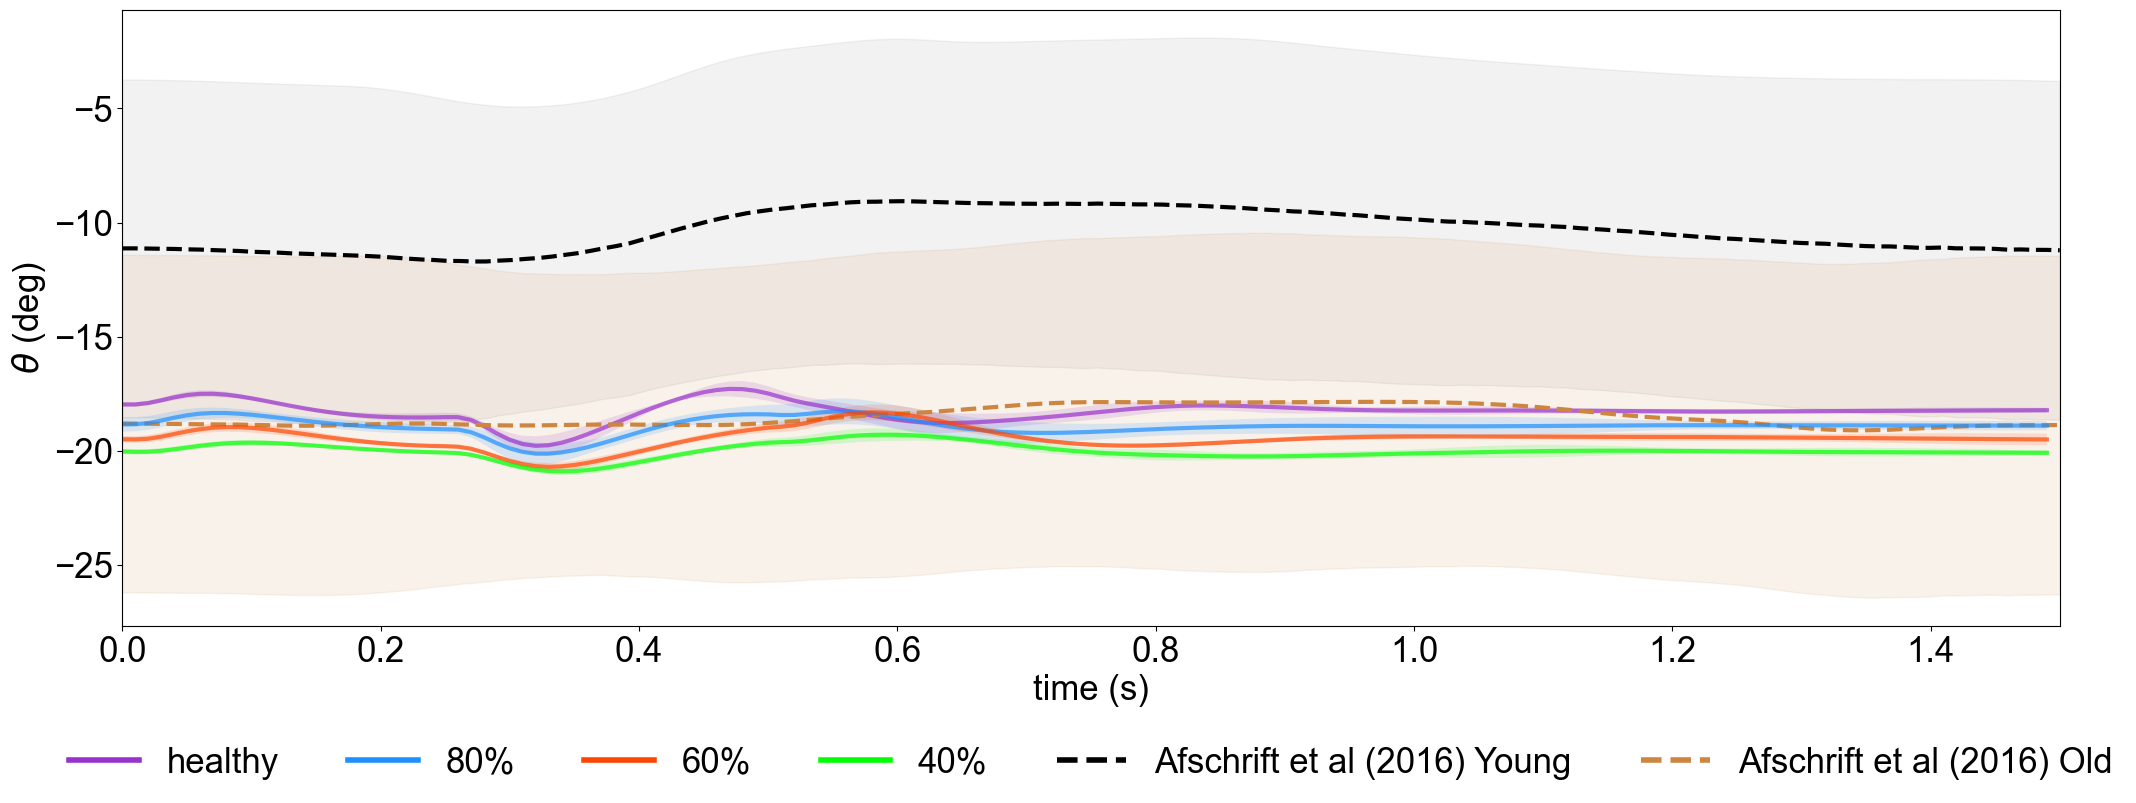

In [51]:
#####plotting the joint angle over time for standing up case
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":25}) 

time_len = 150
x_time = np.arange(0, time_len/100, 0.01)
color = ['dodgerblue', 'orangered', 'lime']

l, l_80, l_60, l_40 = [], [], [], []
for k in pert_1_AP:
    p_t = int(k['modelInfo']['perturbationTime']*100)
    l.append(k['jointInfo']['qpos']['flex_extension'][p_t:p_t+time_len])

mean = np.mean(l, axis = 0)*180/np.pi
std = np.std(l, axis = 0)*180/np.pi
upper = mean + 2*std
lower = mean - 2*std
plt.figure(figsize=(25, 8))
plt.plot(x_time, np.mean(l, axis= 0)*180/np.pi, c = 'darkorchid', alpha = 0.7, linewidth = 3)
plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor ='darkorchid', alpha = 0.15)

mean_e = np.mean(flex_extension_exp, axis = 0)
std_e = np.std(flex_extension_exp, axis = 0)
plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)

mean_e_old = np.mean(flex_extension_old_exp, axis = 0)
std_e_old = np.std(flex_extension_exp, axis = 0)
plt.plot(time_mo, mean_e_old, linewidth = 3, color = 'peru', linestyle = 'dashed')
plt.fill_between(time_mo, mean_e_old-std_e_old, mean_e_old+std_e_old, color = 'peru', alpha = 0.1)


for index, i in enumerate(pert_AP_old_high):
    l_old = []
    for j in i:
        p_t = int(j['modelInfo']['perturbationTime']*100)
        l_old.append(j['jointInfo']['qpos']['flex_extension'][p_t:p_t+time_len])
    mean = np.mean(l_old, axis= 0 ) * 180/np.pi
    std = np.std(l_old, axis = 0) * 180 / np.pi
    upper = mean + 2*std
    lower = mean - 2*std
    plt.plot(x_time, mean, c = color[index], alpha = 0.7, linewidth = 3)
    plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor =color[index], alpha = 0.15)


plt.xlabel('time (s)')
plt.xlim([0, 1.5])
plt.ylabel(r'$\theta$ (deg)')

plt.legend(labels=['healthy', '80%', '60%', '40%', 'Afschrift et al (2016) Young', 'Afschrift et al (2016) Old'], 
           loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=6, frameon = False,
           handles=[
               plt.Line2D([0], [0], color='darkorchid', lw=4),
               plt.Line2D([0], [0], color='dodgerblue', lw=4),
               plt.Line2D([0], [0], color='orangered', lw=4),
               plt.Line2D([0], [0], color='lime', lw=4),
               plt.Line2D([0], [0], linestyle='--', color='black', lw=4),
               plt.Line2D([0], [0], linestyle='--', color='peru', lw=4)
           ])